In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('algerian forest fire prediction.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df = pd.DataFrame(df)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [5]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.shape

(244, 14)

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(243, 14)

## Create a Region Column

The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [10]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [12]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

## Fix Column Names

There is some extra space in some column names. We need to fix this.

<br>

In [14]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 38.5+ KB


In [16]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,16.690535,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,14.228421,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,6.000000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,12.400000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,22.650000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,2.000000


In [17]:
df[F'FWI'].head()

,FWI
0,0.5
1,0.4
2,0.1
3,0
4,0.5


## Fix Datatype

FWI contains float values but its datatype is object. We need to fix this.

In [18]:
df['FWI'] = df['FWI'].astype(float)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


In [20]:
df.Classes.value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


## Cleaning Target Variable

In [21]:
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

,count
Classes,
fire,137
not fire,106


## Encoding Classes

not fire = 0 <br>
fire = 1 <br>

In [22]:
df.Classes = df.Classes.map({'not fire':0,'fire':1})

In [23]:
df.Classes.unique()

array([0, 1])

# Data Visualization

In [24]:
import seaborn as sns

In [25]:
len(df.columns)

15

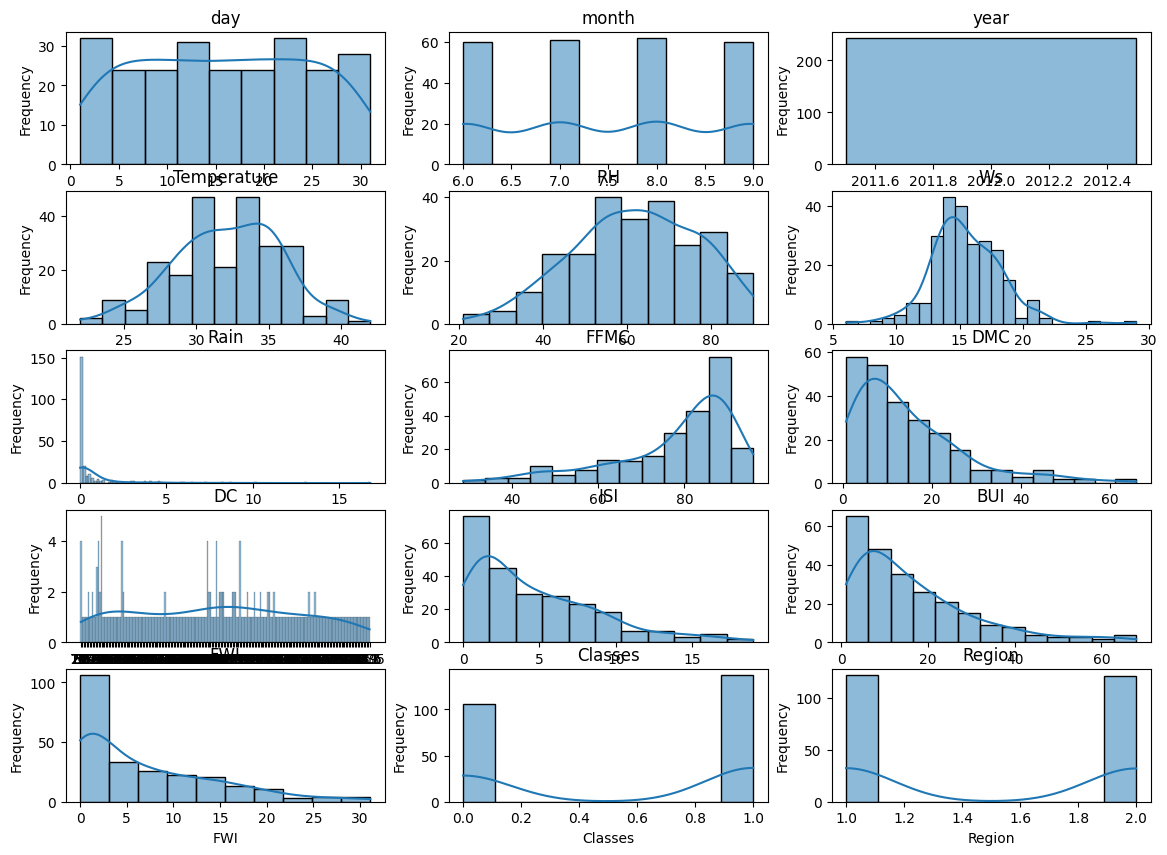

In [26]:
fig, axes = plt.subplots(5, 3, figsize=(14, 10))

for i, column in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# plt.tight_layout()
plt.show()

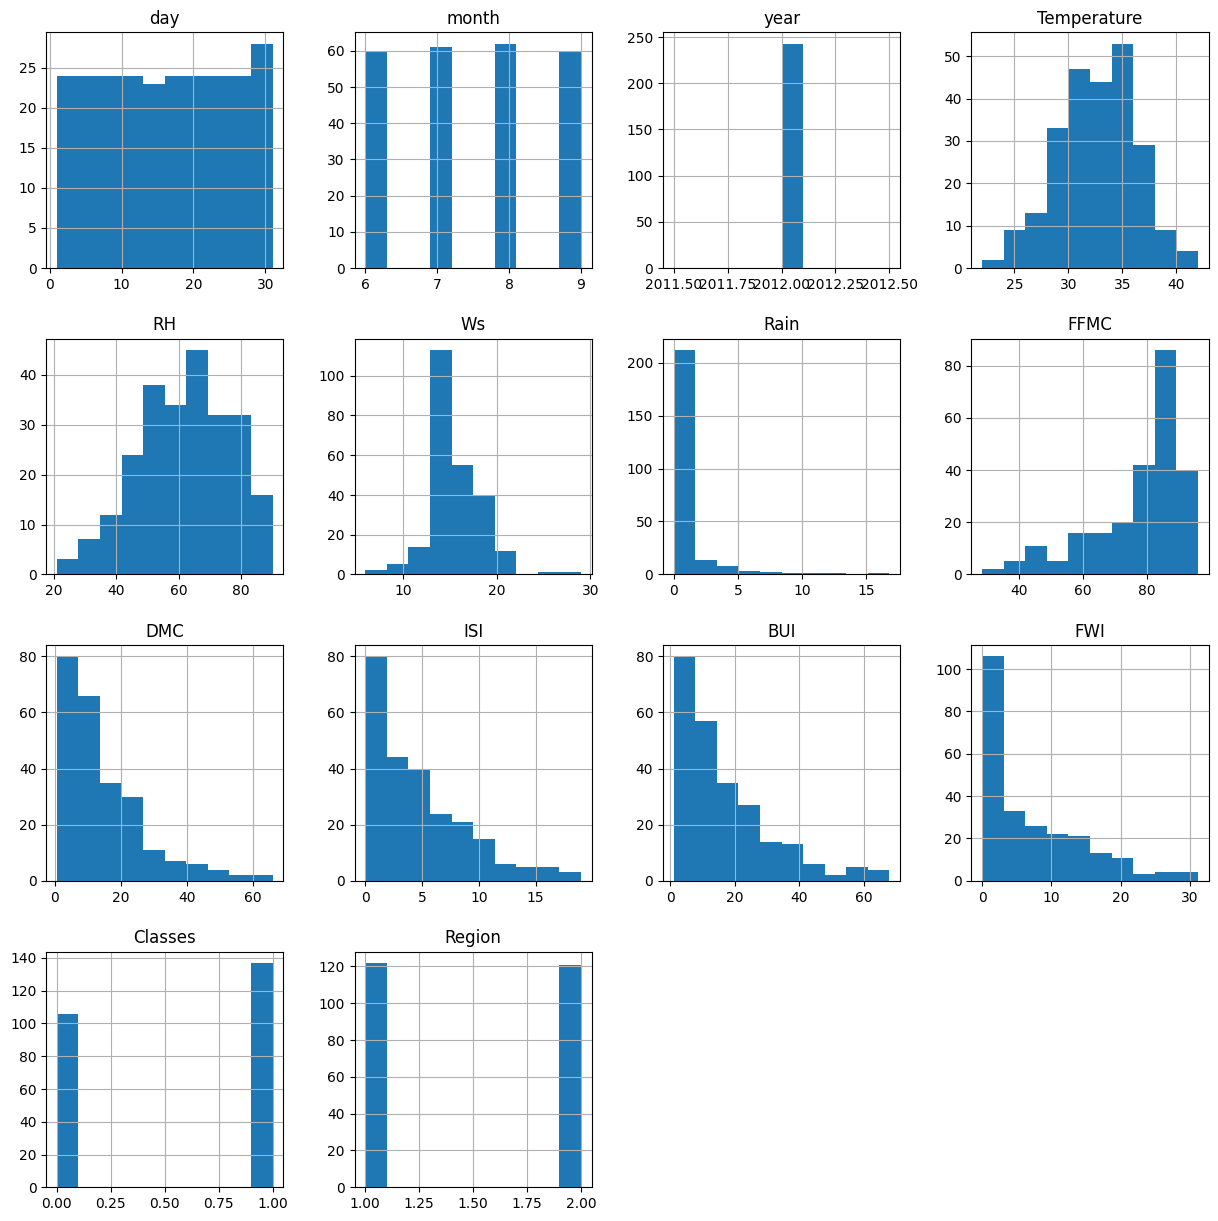

In [27]:
df.hist(figsize=(15,15))
plt.show()

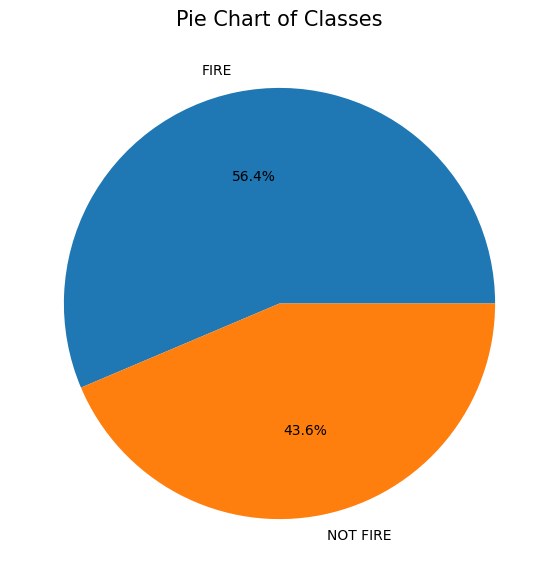

In [28]:
percentage = df.Classes.value_counts(normalize=True)*100
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

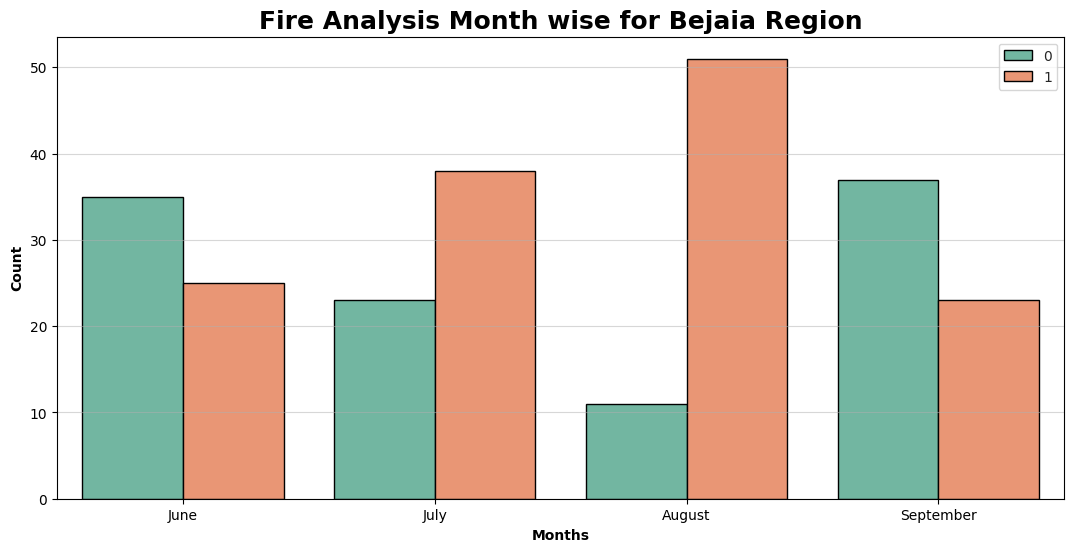

In [29]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

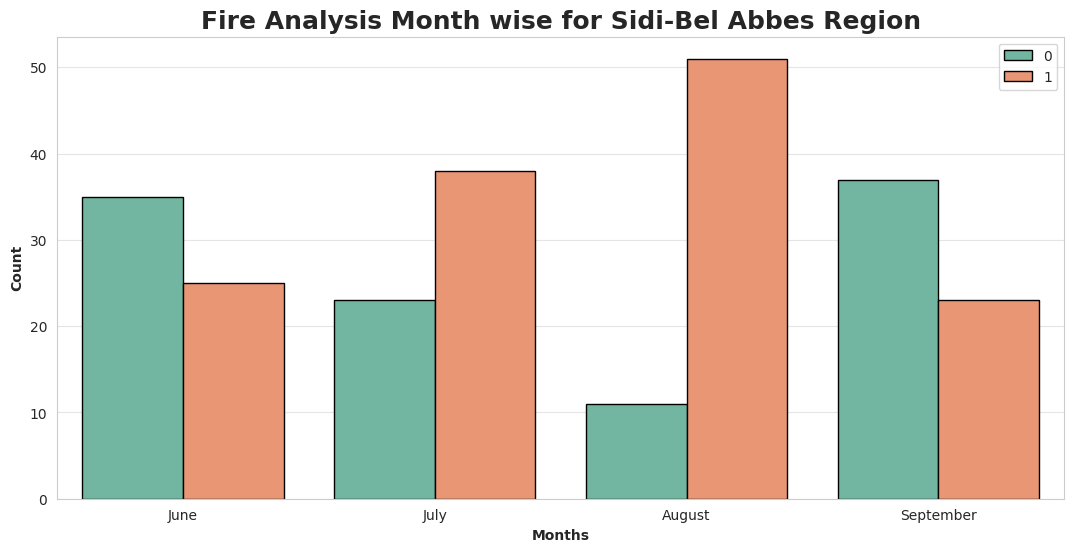

In [30]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

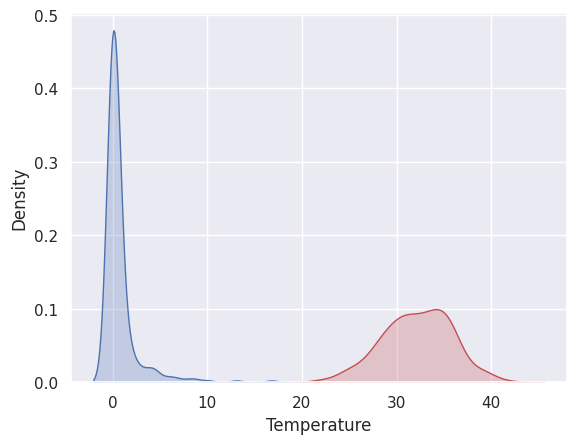

In [31]:
sns.set_theme(style="darkgrid")
sns.kdeplot(df['Temperature'], fill=True, color="r")
sns.kdeplot(df['Rain'], fill=True, color="b")
plt.show()

<ipython-input-32-6748f4b80830>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Classes"], y=df["RH"], palette="Blues")


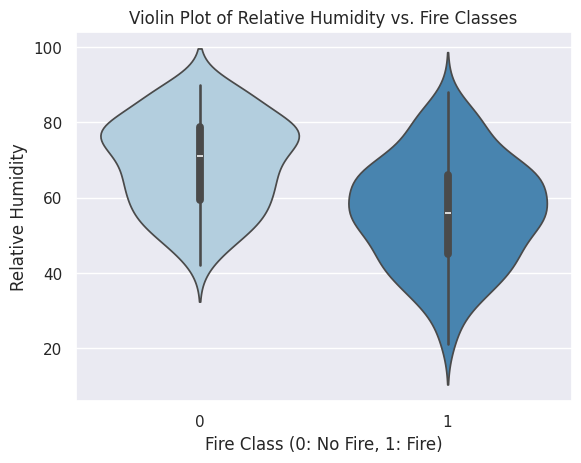

In [32]:
sns.violinplot(x=df["Classes"], y=df["RH"], palette="Blues")
plt.title('Violin Plot of Relative Humidity vs. Fire Classes')
plt.xlabel('Fire Class (0: No Fire, 1: Fire)')
plt.ylabel('Relative Humidity')
plt.show()

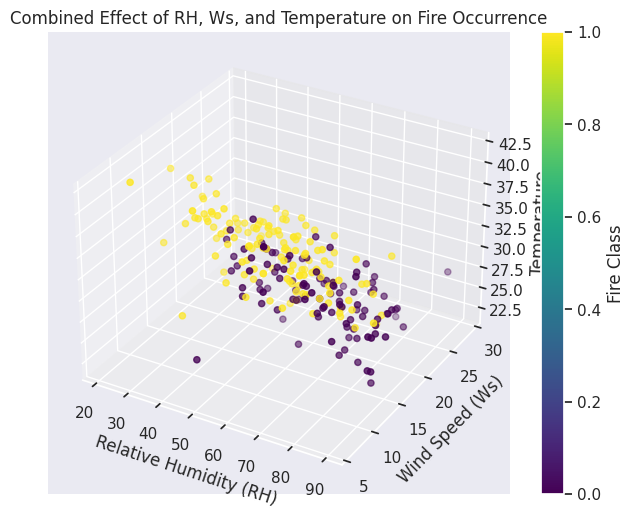

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['RH'], df['Ws'], df['Temperature'], c=df['Classes'], cmap='viridis')
ax.set_xlabel('Relative Humidity (RH)')
ax.set_ylabel('Wind Speed (Ws)')
ax.set_zlabel('Temperature')
ax.set_title('Combined Effect of RH, Ws, and Temperature on Fire Occurrence')
plt.colorbar(scatter, label='Fire Class')
plt.show()

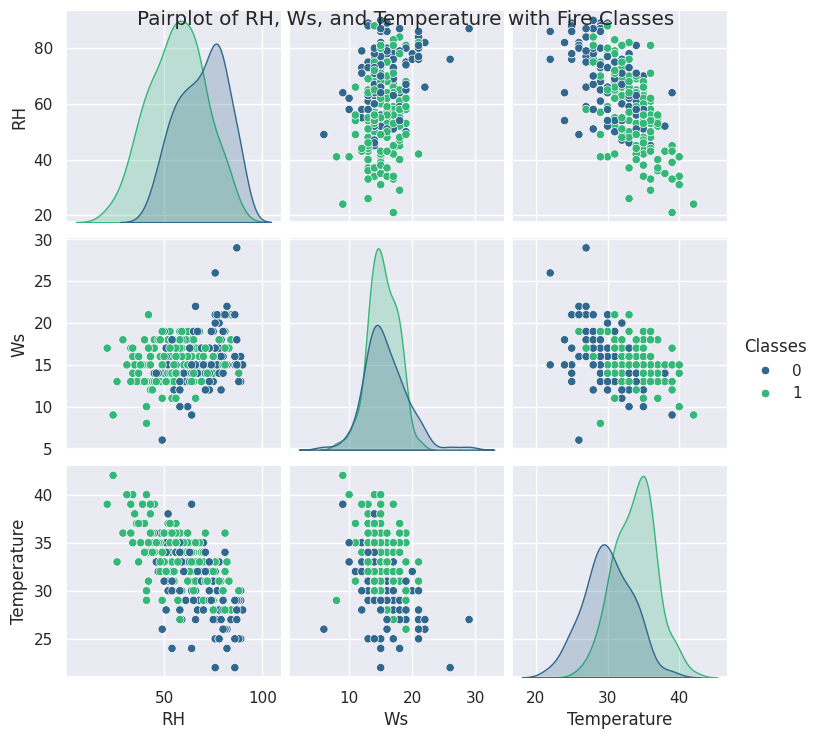

In [34]:
sns.pairplot(df, hue='Classes', vars=['RH', 'Ws', 'Temperature'], palette='viridis')
plt.suptitle('Pairplot of RH, Ws, and Temperature with Fire Classes')
plt.show()


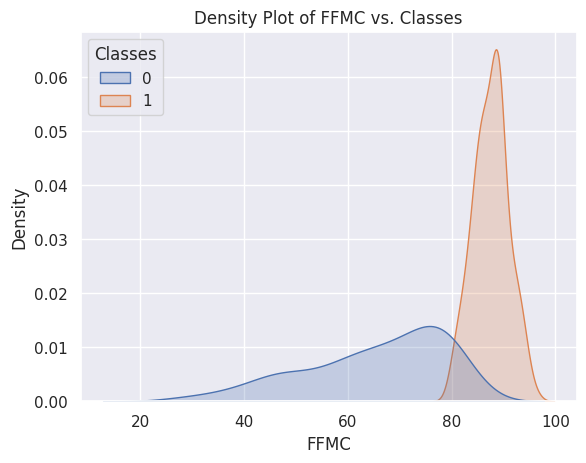

In [35]:
sns.kdeplot(data=df, x='FFMC', hue='Classes', fill=True)
plt.title('Density Plot of FFMC vs. Classes')
plt.xlabel('FFMC')
plt.ylabel('Density')
plt.show()


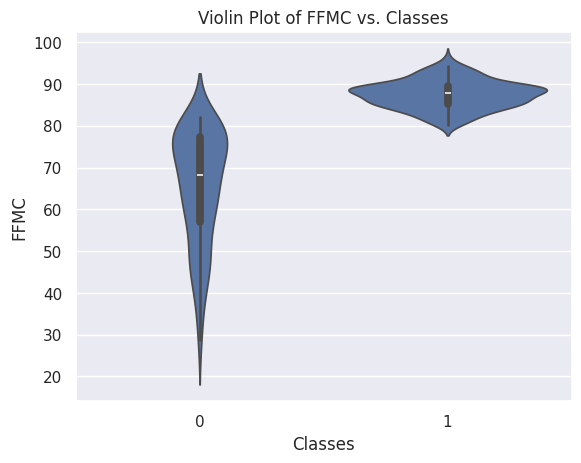

In [36]:
# Violin Plot
sns.violinplot(x='Classes', y='FFMC', data=df)
plt.title('Violin Plot of FFMC vs. Classes')
plt.xlabel('Classes')
plt.ylabel('FFMC')
plt.show()


In [37]:
# !pip install joypy

In [38]:
import joypy

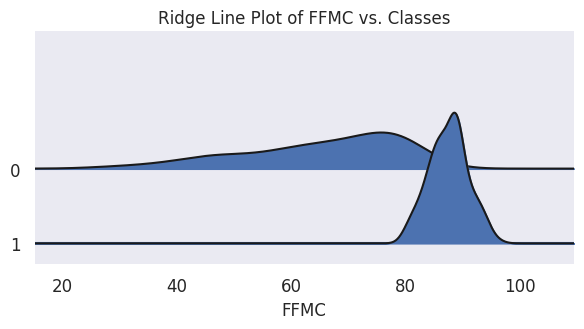

In [39]:
fig, axes = joypy.joyplot(df, column=['FFMC'], by='Classes', figsize=(6, 3))
plt.title('Ridge Line Plot of FFMC vs. Classes')
plt.xlabel('FFMC')
plt.ylabel('Classes')
plt.show()


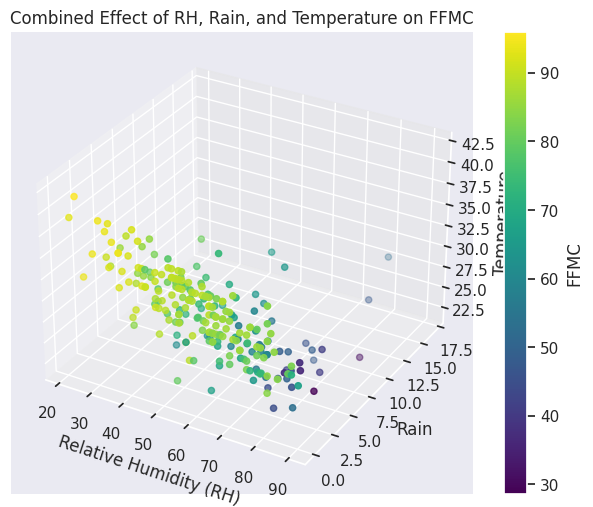

In [40]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['RH'], df['Rain'], df['Temperature'], c=df['FFMC'], cmap='viridis')
ax.set_xlabel('Relative Humidity (RH)')
ax.set_ylabel('Rain')
ax.set_zlabel('Temperature')
ax.set_title('Combined Effect of RH, Rain, and Temperature on FFMC')
plt.colorbar(scatter, label='FFMC')
plt.show()


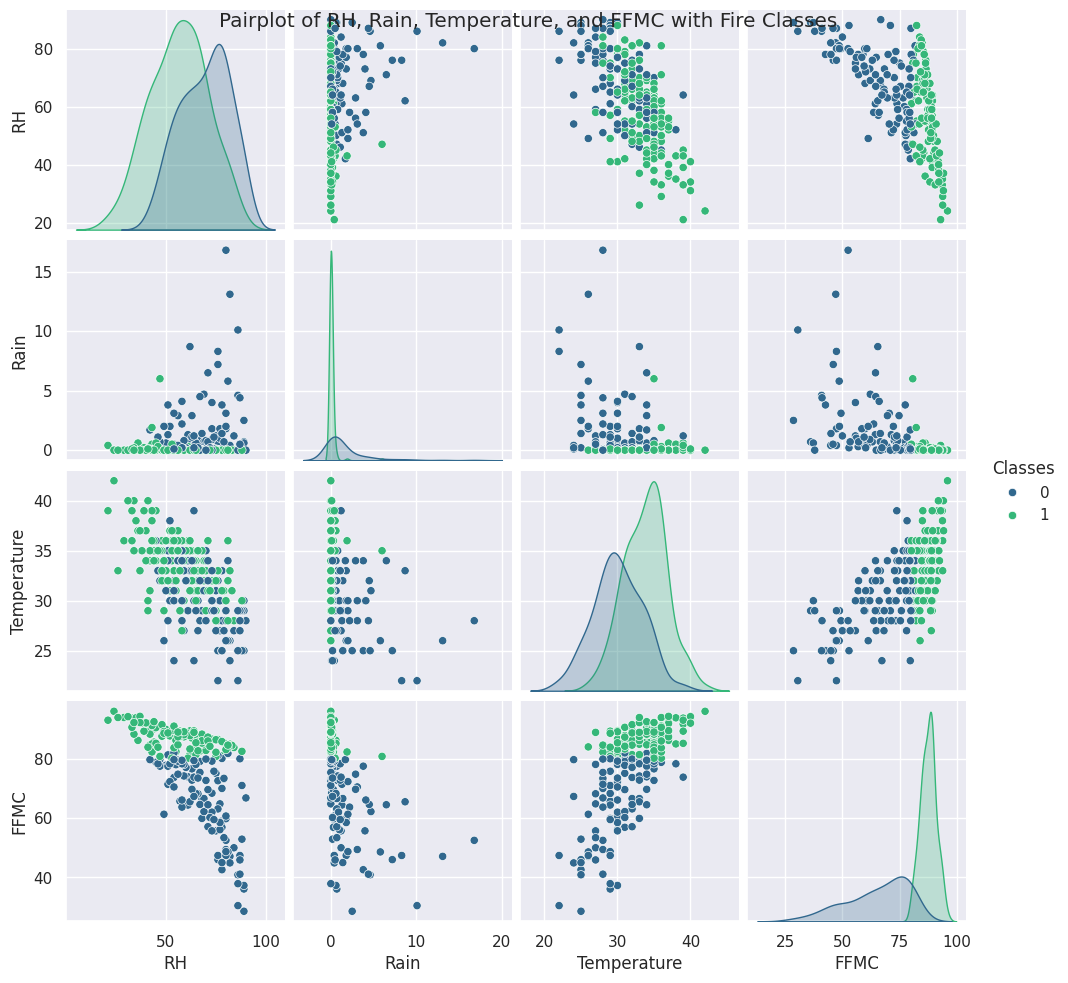

In [41]:
sns.pairplot(df, vars=['RH', 'Rain', 'Temperature', 'FFMC'], hue='Classes', palette='viridis')
plt.suptitle('Pairplot of RH, Rain, Temperature, and FFMC with Fire Classes')
plt.show()

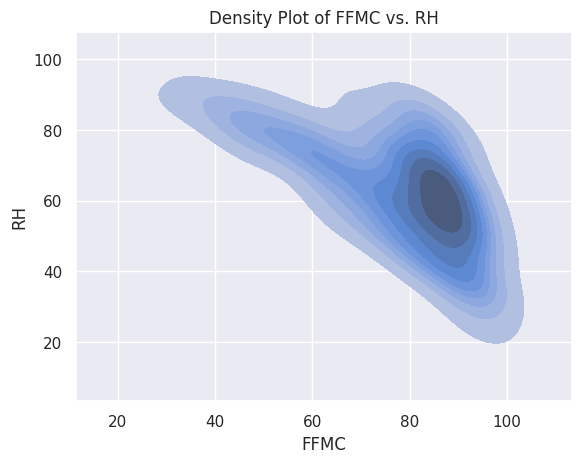

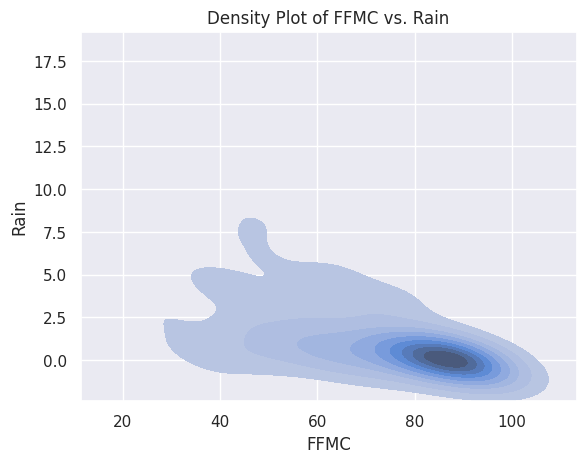

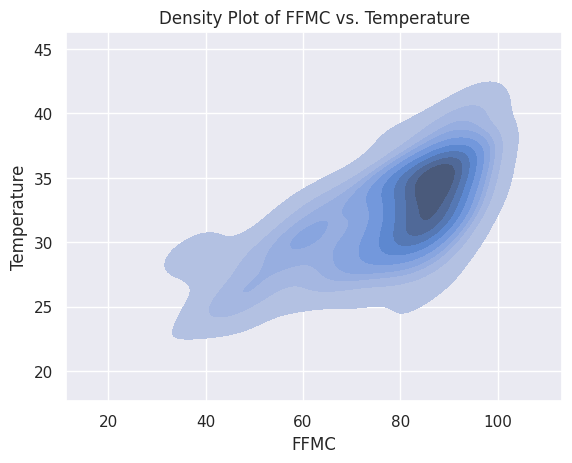

In [42]:
sns.kdeplot(data=df, x='FFMC', y='RH', fill=True)
plt.title('Density Plot of FFMC vs. RH')
plt.xlabel('FFMC')
plt.ylabel('RH')
plt.show()

sns.kdeplot(data=df, x='FFMC', y='Rain', fill=True)
plt.title('Density Plot of FFMC vs. Rain')
plt.xlabel('FFMC')
plt.ylabel('Rain')
plt.show()

sns.kdeplot(data=df, x='FFMC', y='Temperature', fill=True)
plt.title('Density Plot of FFMC vs. Temperature')
plt.xlabel('FFMC')
plt.ylabel('Temperature')
plt.show()


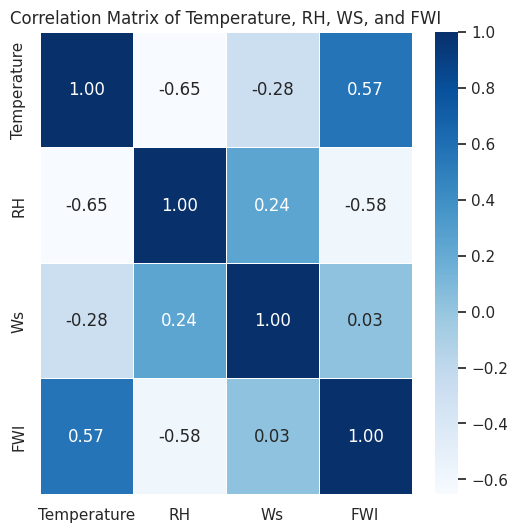

In [43]:
correlation_matrix = df[['Temperature', 'RH', 'Ws', 'FWI']].corr()

plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Temperature, RH, WS, and FWI')
plt.show()


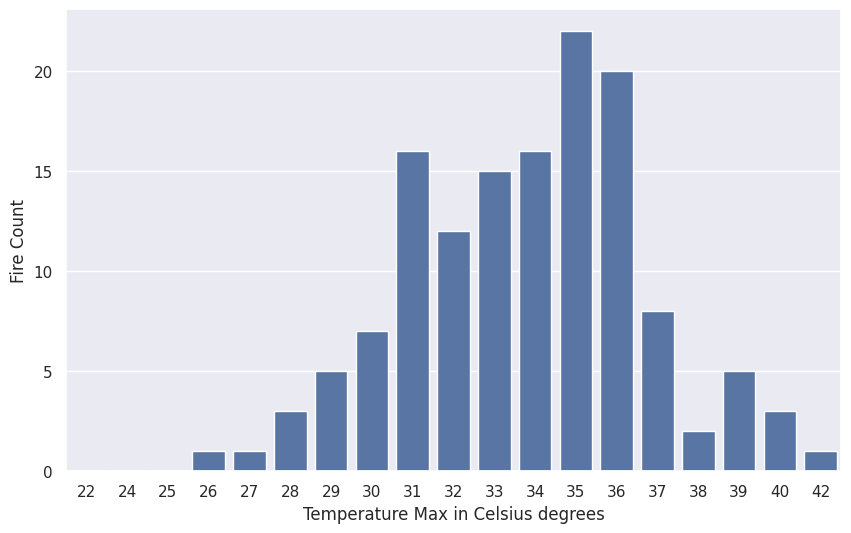

In [44]:
def visualize_classes(feature,xlabel):
    plt.figure(figsize=[10,6])
    by_feature =  df.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

visualize_classes('Temperature','Temperature Max in Celsius degrees')

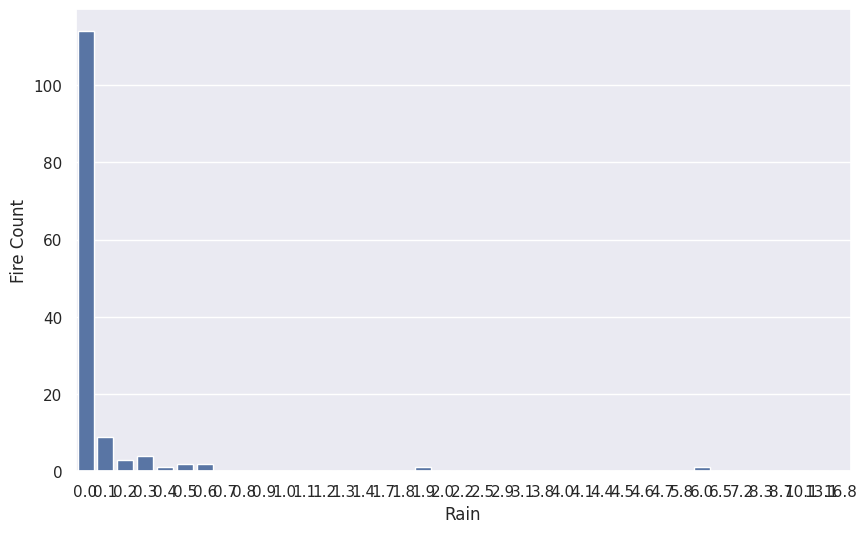

In [45]:
visualize_classes('Rain','Rain')

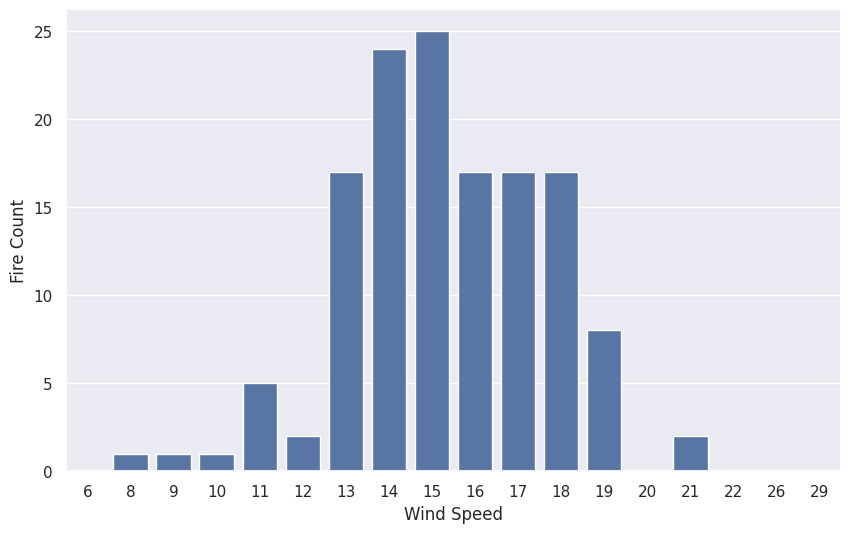

In [46]:
visualize_classes('Ws','Wind Speed')

# Check for Multicollinearity

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.672796,-1.350168,0.0,-0.870655,-0.340673,0.893277,-0.381657,-0.847927,-0.912120,-0.879401,-0.830356,-0.936012,-0.880159,-1.136861,-0.995893
1,-1.559473,-1.350168,0.0,-0.870655,-0.070359,-0.888877,0.268642,-0.938709,-0.855520,-0.879401,-0.902720,-0.900798,-0.893626,-1.136861,-0.995893
2,-1.446150,-1.350168,0.0,-1.699254,1.348788,2.319000,6.171355,-2.146802,-0.984891,-0.889913,-1.071571,-0.985310,-0.934029,-1.136861,-0.995893
3,-1.332827,-1.350168,0.0,-1.975454,1.821837,-0.888877,0.868918,-3.438694,-1.081920,-0.894117,-1.143935,-1.055737,-0.947497,-1.136861,-0.995893
4,-1.219504,-1.350168,0.0,-1.423054,1.010896,0.180416,-0.381657,-0.910776,-0.944463,-0.740651,-0.854477,-0.900798,-0.880159,-1.136861,-0.995893


In [49]:
constant_features = scaled_data_df.columns[scaled_data_df.var() == 0]
scaled_data_df = scaled_data_df.drop(columns=constant_features)

if scaled_data_df.isnull().sum().any():
    scaled_data_df = scaled_data_df.dropna()

corr_matrix = np.corrcoef(scaled_data_df.T)

corr_matrix_abs = np.abs(corr_matrix)
np.fill_diagonal(corr_matrix_abs, 0)
highly_corr_features = np.where(corr_matrix_abs > 0.9)

highly_corr_pairs = [(scaled_data_df.columns[i], scaled_data_df.columns[j]) for i, j in zip(*highly_corr_features)]

to_drop = set()
for (i, j) in highly_corr_pairs:
    to_drop.add(i)

scaled_data_df = scaled_data_df.drop(columns=to_drop)

corr_matrix = np.corrcoef(scaled_data_df.T)

In [50]:
eigvals, eigvecs = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigvals)

max_eigenvalue = np.max(eigvals)
min_eigenvalue = np.min(eigvals)

eigenvalue_ratio = max_eigenvalue / min_eigenvalue
print("Eigenvalue ratio (max/min):", eigenvalue_ratio)

condition_number = np.linalg.cond(corr_matrix)
print("Condition Number:", condition_number)


Eigenvalues: [3.35802245 1.24037522 0.1433358  1.0127854  0.94738763 0.84105016
 0.31687132 0.47781411 0.66235791]
Eigenvalue ratio (max/min): 23.427660374923164
Condition Number: 23.42766037492307


# Model Training

In [51]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [61]:
df.to_csv('fire dataset cleaned.csv')

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [53]:
from sklearn.cluster import KMeans

In [63]:
df.month.unique()

array([6, 7, 8, 9])

In [70]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [71]:
# Drop the 'Classes' and 'Region' columns
df_cleaned = df.drop(columns=['Classes', 'Region', 'day', 'month', 'year'])

# Perform train-test split
# from sklearn.model_selection import train_test_split

X = df_cleaned
y = df['Classes']  # We will keep the 'Classes' column for clustering evaluation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KMeans clustering model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # We assume 3 risk levels (low, medium, high)
kmeans.fit(X_train)

# Predict the risk level on the test set
y_pred = kmeans.predict(X_test)
y_pred


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1], dtype=int32)

In [72]:
centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=X.columns)

cluster_labels = pd.DataFrame({'True Risk': y_test, 'Cluster Prediction': y_pred})

centroids_df, cluster_labels.groupby('Cluster Prediction')['True Risk'].value_counts()


(   Temperature         RH         Ws      Rain       FFMC        DMC  \
 0    30.915254  66.008475  15.500000  1.255932  72.213559   7.384746   
 1    34.181818  54.145455  15.527273  0.074545  86.985455  22.330909   
 2    34.142857  58.238095  16.523810  0.061905  87.890476  40.485714   
 
            DC       ISI        BUI        FWI  
 0   19.252542  2.944915   7.877119   2.979661  
 1   76.696364  7.910909  25.563636  12.492727  
 2  163.914286  8.390476  49.085714  19.085714  ,
 Cluster Prediction  True Risk
 0                   0            20
                     1            12
 1                   1            13
                     0             1
 2                   1             2
                     0             1
 Name: count, dtype: int64)

In [73]:
centroids_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,30.915254,66.008475,15.500000,1.255932,72.213559,7.384746,19.252542,2.944915,7.877119,2.979661
1,34.181818,54.145455,15.527273,0.074545,86.985455,22.330909,76.696364,7.910909,25.563636,12.492727
2,34.142857,58.238095,16.523810,0.061905,87.890476,40.485714,163.914286,8.390476,49.085714,19.085714


In [74]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_test, y_pred)

risk_levels = ['Low', 'Medium', 'High']
risk_predictions = [risk_levels[label] for label in y_pred]

silhouette_avg, risk_predictions[:10]


(np.float64(0.3886316574457529),
 ['Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low'])

# Save the Model

In [75]:
import pickle

In [77]:
with open('forest_fire_predictor.pkl', 'wb') as model:
    pickle.dump(kmeans, model)